In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import keras

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [4]:
print(X_train[0].shape)

(32, 32, 3)


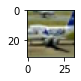

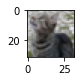

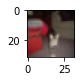

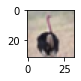

In [5]:
for i in range(332,336):
  plt.subplot(120+1+i)
  img=X_train[i]
  plt.imshow(img)
  plt.show()

In [6]:
X_train=X_train.reshape(X_train.shape[0],32,32,3)
X_test=X_test.reshape(X_test.shape[0],32,32,3)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255
n_classes=10
print("Shape before one-hot encoding:",y_train.shape)
Y_train=np_utils.to_categorical(y_train,n_classes)
Y_test=np_utils.to_categorical(y_test,n_classes)
print("Shape after one-hot encoding:",Y_train.shape)

Shape before one-hot encoding: (50000, 1)
Shape after one-hot encoding: (50000, 10)


In [7]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPool2D,Flatten
model=Sequential()
model.add(Conv2D(50,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.fit(X_train,Y_train,batch_size=128,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
391/391 [==============================] - 474s 1s/step - loss: 1.5869 - accuracy: 0.4173 - val_loss: 1.1395 - val_accuracy: 0.5960
Epoch 2/10
391/391 [==============================] - 471s 1s/step - loss: 1.1064 - accuracy: 0.6077 - val_loss: 0.9300 - val_accuracy: 0.6821
Epoch 3/10
391/391 [==============================] - 469s 1s/step - loss: 0.9253 - accuracy: 0.6769 - val_loss: 0.8071 - val_accuracy: 0.7223
Epoch 4/10
391/391 [==============================] - 468s 1s/step - loss: 0.8144 - accuracy: 0.7160 - val_loss: 0.7468 - val_accuracy: 0.7420
Epoch 5/10
391/391 [==============================] - 469s 1s/step - loss: 0.7329 - accuracy: 0.7423 - val_loss: 0.7382 - val_accuracy: 0.7462
Epoch 6/10
391/391 [==============================] - 469s 1s/step - loss: 0.6697 - accuracy: 0.7671 - val_loss: 0.7015 - val_accuracy: 0.7582
Epoch 7/10
391/391 [==============================] - 469s 1s/step - loss: 0.6129 - accuracy: 0.7862 - val_loss: 0.6942 - val_accuracy: 0.7639

In [8]:
classes=range(0,10)
names=['airplane',
       'automobile',
       'bird',
       'cat',
       'deer',
       'dog',
       'frog',
       'horse',
       'ship',
       'truck']
class_labels=dict(zip(classes,names))
batch=X_test[100:109]
labels=np.argmax(Y_test[100:109],axis=-1)
predictions=model.predict(batch,verbose=1)

1/1 [==============================] - 0s 120ms/step


In [9]:
print(predictions)

[[3.17694829e-03 2.75308121e-04 1.70468688e-01 7.26999938e-02
  4.02873665e-01 1.59610748e-01 7.22365361e-03 1.80203050e-01
  1.72894972e-03 1.73893757e-03]
 [1.14029401e-03 4.96556691e-04 1.15292661e-01 2.31824026e-01
  4.11335081e-02 4.12938505e-01 1.68515712e-01 2.21979059e-02
  4.59915958e-03 1.86162174e-03]
 [6.01178253e-05 1.01264795e-05 4.85963281e-03 2.33725319e-03
  6.25387620e-05 1.44183752e-03 9.91099894e-01 2.63437068e-05
  2.70915443e-05 7.51169791e-05]
 [1.04698429e-05 1.16703887e-07 1.81019679e-03 9.36558485e-01
  4.25033756e-02 5.21603739e-03 1.38647407e-02 2.96795661e-05
  6.45753335e-06 4.45585044e-07]
 [2.57070127e-07 9.92110968e-01 6.46176472e-12 8.28568811e-11
  1.14468981e-13 1.14663808e-11 1.16486161e-11 2.23883238e-12
  3.11280746e-05 7.85767939e-03]
 [3.85100066e-05 9.85430479e-01 1.28727162e-09 8.08832201e-09
  1.60099309e-10 5.86860061e-10 7.02760428e-09 7.92536939e-11
  2.22393475e-03 1.23071074e-02]
 [1.25821993e-01 2.55316426e-03 2.14147955e-01 1.96276814e

In [10]:
for image in predictions:
  print(np.sum(image))

0.99999994
1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0


In [11]:
class_result=np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 3 1 1 2 6 8]


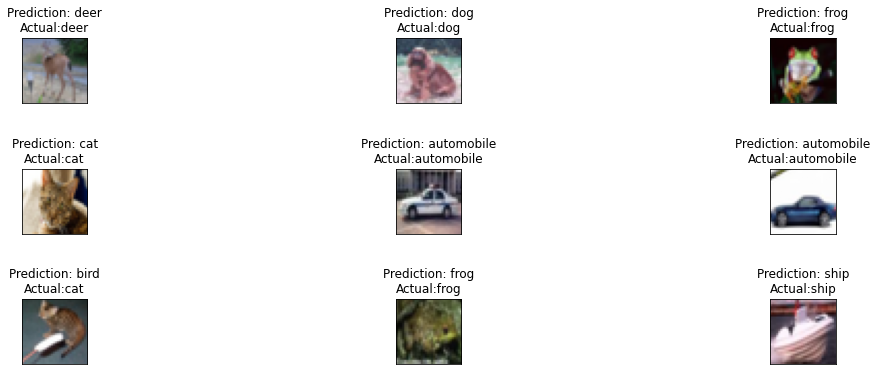

In [12]:
fig,axs=plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()
for i,img in enumerate(batch):
  for key,value in class_labels.items():
    if class_result[i]==key:
      title='Prediction: {}\nActual:{}'.format(class_labels[key],class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
  axs[i].imshow(img)
plt.show(True)